<h1><center>Markov Chains Project</center></h1>
<h2><center>Team JLRCactus</center></h2>

## Imports ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys as sys

## Main ##

### Variables ###

In [3]:
# Values of dimensions n and m
n = 1000
m = 8000
# Initial random vector
x0 = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1

# To be found vector
X = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1 

# Known matrix W
W = np.random.normal(loc=0, scale=1, size=[m,n]) # W ~ N(0,1)

beta0=0.2


### Run ###

## Tools ##

In [4]:
def ReLU(x) :
    return x * (x > 0)

In [5]:
def compute_Y(W, X) :
    n = W.shape[1]
    return ReLU((W @ X)/np.sqrt(n))

In [6]:
def compute_H(W, x, Y) :
    diff = Y - compute_Y(W, x)
    return diff.T.dot(diff)

In [7]:
def random_flip(x) :
    i = np.random.randint(low=0, high=len(x))
    new_x = x.copy()
    new_x[i] = -new_x[i]
    return new_x

In [8]:
def accept(W, x0, x1, beta, Y) :
    return min(1, np.exp(-beta*( compute_H(W, x1, Y) - compute_H(W, x0, Y) )))

In [9]:
def rec_error(x0, X, n):
    n = len(X)
    return (x0-X).T.dot(x0-X) / (4*n)

## Metropolis Algorithm ##

In [11]:
def metropolis(W, X, x0, threshold, beta0) :
    
    e = sys.maxsize
    beta = beta0
    Y_true = compute_Y(W, X)
    n = len(X)
    errors = []
    energies = []
    betas = []
    i = 0
    nbre_iter= 5000
    from_last_beta = 0
    beta_augm =0.2
    treshold = nbre_iter/40
    while e > threshold and i < nbre_iter: 
        i +=1
        from_last_beta += 1
        
        x1 = random_flip(x0)
        a = accept(W, x0, x1, beta, Y_true)
        
        if a >= np.random.uniform() : # Swap with prob metropolis
            x0 = x1
        
        if (from_last_beta> treshold and np.std(energies[-200:]) < m/285.7):
            print(i, end=', ')
            beta += beta_augm
            from_last_beta = 0
        energies.append(compute_H(W, x0, Y_true))        
        e = rec_error(x0, X, n)
        errors.append(e)      
        betas.append(beta)
        
    return x0, errors, energies, betas

In [25]:
found_X, errors, energies, betas = metropolis(W, X, x0, 0, beta0)

805
2663
2739


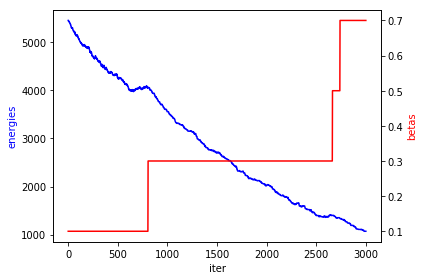

In [26]:
fig, ax1 = plt.subplots()

s1 = energies
ax1.plot(s1, 'b')
ax1.set_xlabel('iter')

ax1.set_ylabel('energies', color='b')

ax2 = ax1.twinx()
s2 = betas
ax2.plot(s2, 'r')
ax2.set_ylabel('betas', color='r')

fig.tight_layout()
plt.show()

In [27]:
betas[-1]

0.7

In [28]:
min(errors)

0.083000000000000004

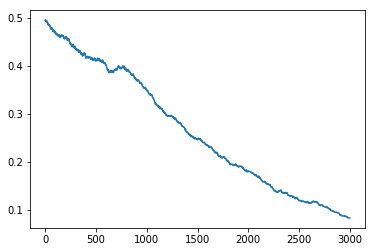

In [29]:
plt.plot(errors)
plt.show()

In [30]:
(found_X != X).sum()

83

## Find expected value and std dev ##

In [12]:
def exp_std_error(number_experiments=10):
    
    mean_list = []
    std_list = []
    
    for m in range(1000, 11000, 1000):
    
        error_m = []

        for j in range(0,number_experiments):

            #  drawing W and X
            x0 = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1
            X = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1 
            W = np.random.normal(loc=0, scale=1, size=[m,n]) # W ~ N(0,1)

            print()
            print("---- New experiment with alpha={} ----" .format( m/n))
            found_X, errors, energies, betas = metropolis(W, X, x0, 0, beta0)

            error_m.append(min(errors))

        mean = np.mean(error_m)
        std_dev = np.std(error_m)
        
        mean_list.append(mean)
        std_list.append(std_dev)
    
    return mean_list, std_list

In [13]:
mean_list, std_list = exp_std_error()
mean_list, std_list


---- New experiment with alpha=1.0 ----
126, 252, 378, 504, 630, 756, 882, 1008, 1134, 1260, 1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268, 2394, 2520, 2646, 2772, 2898, 3024, 3150, 3276, 3402, 3528, 3654, 3780, 3906, 4032, 4158, 4284, 4410, 4536, 4662, 4788, 4914, 
---- New experiment with alpha=1.0 ----
126, 252, 467, 593, 719, 845, 971, 1097, 1223, 1349, 1475, 1601, 1727, 1853, 1979, 2105, 2231, 2357, 2483, 2609, 2735, 2861, 2987, 3113, 3239, 3365, 3491, 3617, 3743, 3869, 3995, 4121, 4247, 4373, 4499, 4625, 4751, 4877, 
---- New experiment with alpha=1.0 ----
126, 252, 378, 504, 707, 833, 959, 1085, 1211, 1337, 1463, 1589, 1715, 1841, 1967, 2093, 2219, 2345, 2471, 2597, 2723, 2849, 2975, 3101, 3227, 3353, 3479, 3605, 3731, 3857, 3983, 4109, 4235, 4361, 4487, 4613, 4739, 4865, 4991, 
---- New experiment with alpha=1.0 ----
126, 355, 481, 607, 733, 859, 985, 1111, 1237, 1363, 1489, 1615, 1741, 1867, 1993, 2119, 2245, 2371, 2497, 2623, 2749, 2875, 3001, 3127, 3253, 3379, 3505, 3631, 

817, 1202, 1814, 2041, 2167, 2408, 2534, 2660, 2786, 2912, 3038, 3164, 3290, 3416, 3542, 3668, 3794, 3920, 4046, 4172, 4298, 4424, 4550, 4676, 4802, 4928, 
---- New experiment with alpha=4.0 ----
868, 1216, 1342, 2173, 2343, 2469, 2617, 2743, 2869, 2995, 3121, 3247, 3373, 3499, 3625, 3751, 3877, 4003, 4129, 4255, 4381, 4507, 4633, 4759, 4885, 
---- New experiment with alpha=4.0 ----
719, 1106, 1651, 1937, 2301, 2427, 2553, 2679, 2850, 2976, 3102, 3228, 3354, 3480, 3606, 3732, 3858, 3984, 4110, 4236, 4362, 4488, 4614, 4740, 4866, 4992, 
---- New experiment with alpha=4.0 ----
664, 1422, 1701, 2075, 2201, 2327, 2453, 2745, 2871, 2997, 3123, 3249, 3375, 3501, 3627, 3753, 3879, 4005, 4131, 4257, 4383, 4509, 4635, 4761, 4887, 
---- New experiment with alpha=4.0 ----
979, 1416, 1887, 2184, 2426, 2552, 2678, 2804, 2930, 3056, 3182, 3308, 3434, 3560, 3686, 3812, 3938, 4064, 4190, 4316, 4442, 4568, 4694, 4820, 4946, 
---- New experiment with alpha=4.0 ----
850, 1691, 1817, 2170, 2571, 2697, 282

1689, 3789, 3915, 4041, 4167, 4293, 4419, 4545, 4671, 4797, 4923, 
---- New experiment with alpha=10.0 ----
1995, 3896, 4022, 4148, 4274, 4400, 4526, 4652, 4778, 4904, 
---- New experiment with alpha=10.0 ----
2557, 3597, 3868, 3994, 4120, 4246, 4372, 4609, 4735, 4861, 4987, 

([0.2852,
  0.13979999999999998,
  0.040299999999999996,
  0.0223,
  0.0179,
  0.013900000000000001,
  0.012300000000000002,
  0.011199999999999998,
  0.009300000000000001,
  0.008000000000000002],
 [0.020546532554180517,
  0.022955609336282056,
  0.012198770429842508,
  0.0050999999999999995,
  0.004459820624195552,
  0.0021656407827707713,
  0.0042438190347845895,
  0.002891366458960192,
  0.0029000000000000002,
  0.0032863353450309964])

In [24]:
def exp_std_error2(number_experiments=10):
    
    mean_list = []
    std_list = []
    
    for m in range(1, 1100, 100):
    
        error_m = []

        for j in range(0,number_experiments):

            #  drawing W and X
            x0 = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1
            X = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1 
            W = np.random.normal(loc=0, scale=1, size=[m,n]) # W ~ N(0,1)

            print()
            print("---- New experiment with alpha={} ----" .format( m/n))
            found_X, errors, energies, betas = metropolis(W, X, x0, 0, beta0)

            error_m.append(min(errors))

        mean = np.mean(error_m)
        std_dev = np.std(error_m)
        
        mean_list.append(mean)
        std_list.append(std_dev)
    
    return mean_list, std_list

In [25]:
mean_list_inf1, std_list_inf1 = exp_std_error2()
mean_list_inf1, std_list_inf1


---- New experiment with alpha=0.001 ----
126, 252, 378, 504, 630, 756, 882, 1008, 1134, 1260, 1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268, 2394, 2520, 2646, 2772, 2898, 3024, 3150, 3276, 3402, 3528, 3654, 3780, 3906, 4032, 4158, 4284, 4410, 4536, 4662, 4788, 4914, 
---- New experiment with alpha=0.001 ----
126, 252, 378, 504, 630, 756, 882, 1008, 1134, 1260, 1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268, 2394, 2520, 2646, 2772, 2898, 3024, 3150, 3276, 3402, 3528, 3654, 3780, 3906, 4032, 4158, 4284, 4410, 4536, 4662, 4788, 4914, 
---- New experiment with alpha=0.001 ----
126, 252, 378, 504, 630, 756, 882, 1008, 1134, 1260, 1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268, 2394, 2520, 2646, 2772, 2898, 3024, 3150, 3276, 3402, 3528, 3654, 3780, 3906, 4032, 4158, 4284, 4410, 4536, 4662, 4788, 4914, 
---- New experiment with alpha=0.001 ----
126, 252, 378, 504, 630, 756, 882, 1008, 1134, 1260, 1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268, 2394, 2520, 2646, 2772, 2898, 3024, 3150, 3276

126, 252, 378, 504, 630, 756, 882, 1008, 1134, 1260, 1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268, 2394, 2520, 2646, 2772, 2898, 3024, 3150, 3276, 3402, 3528, 3654, 3780, 3906, 4032, 4158, 4284, 4410, 4536, 4662, 4788, 4914, 
---- New experiment with alpha=0.301 ----
126, 252, 378, 504, 630, 756, 882, 1008, 1134, 1260, 1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268, 2394, 2520, 2646, 2772, 2898, 3024, 3150, 3276, 3402, 3528, 3654, 3780, 3906, 4032, 4158, 4284, 4410, 4536, 4662, 4788, 4914, 
---- New experiment with alpha=0.301 ----
126, 252, 378, 504, 630, 756, 882, 1008, 1134, 1260, 1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268, 2394, 2520, 2646, 2772, 2898, 3024, 3150, 3276, 3402, 3528, 3654, 3780, 3906, 4032, 4158, 4284, 4410, 4536, 4662, 4788, 4914, 
---- New experiment with alpha=0.301 ----
126, 252, 378, 504, 630, 756, 882, 1008, 1134, 1260, 1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268, 2394, 2520, 2646, 2772, 2898, 3024, 3150, 3276, 3402, 3528, 3654, 3780, 3906, 4032, 4158,

126, 252, 378, 504, 630, 756, 882, 1008, 1134, 1260, 1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268, 2394, 2520, 2646, 2772, 2898, 3024, 3150, 3276, 3402, 3528, 3654, 3780, 3906, 4032, 4158, 4284, 4410, 4536, 4662, 4788, 4914, 
---- New experiment with alpha=0.601 ----
126, 252, 378, 504, 630, 756, 882, 1008, 1134, 1260, 1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268, 2394, 2520, 2646, 2772, 2898, 3024, 3150, 3276, 3402, 3528, 3654, 3780, 3906, 4032, 4158, 4284, 4410, 4536, 4662, 4788, 4914, 
---- New experiment with alpha=0.601 ----
126, 252, 378, 504, 630, 756, 882, 1008, 1134, 1260, 1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268, 2394, 2520, 2646, 2772, 2898, 3024, 3150, 3276, 3402, 3528, 3654, 3780, 3906, 4032, 4158, 4284, 4410, 4536, 4662, 4788, 4914, 
---- New experiment with alpha=0.601 ----
126, 252, 378, 504, 630, 756, 882, 1008, 1134, 1260, 1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268, 2394, 2520, 2646, 2772, 2898, 3024, 3150, 3276, 3402, 3528, 3654, 3780, 3906, 4032, 4158,

235, 361, 508, 634, 760, 886, 1012, 1138, 1264, 1390, 1516, 1642, 1768, 1894, 2020, 2146, 2272, 2398, 2524, 2650, 2776, 2902, 3028, 3154, 3280, 3406, 3532, 3658, 3784, 3910, 4036, 4162, 4288, 4414, 4540, 4666, 4792, 4918, 
---- New experiment with alpha=0.901 ----
126, 252, 378, 504, 630, 756, 882, 1008, 1134, 1260, 1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268, 2394, 2520, 2646, 2772, 2898, 3024, 3150, 3276, 3402, 3528, 3654, 3780, 3906, 4032, 4158, 4284, 4410, 4536, 4662, 4788, 4914, 
---- New experiment with alpha=0.901 ----
126, 357, 483, 609, 766, 892, 1018, 1144, 1270, 1396, 1522, 1648, 1774, 1900, 2026, 2152, 2278, 2404, 2530, 2656, 2782, 2908, 3034, 3160, 3286, 3412, 3538, 3664, 3790, 3916, 4042, 4168, 4294, 4420, 4546, 4672, 4798, 4924, 
---- New experiment with alpha=0.901 ----
126, 252, 378, 504, 630, 756, 882, 1008, 1134, 1260, 1386, 1512, 1638, 1764, 1890, 2016, 2142, 2268, 2394, 2520, 2646, 2772, 2898, 3024, 3150, 3276, 3402, 3528, 3654, 3780, 3906, 4032, 4158, 4284, 441

([0.4659,
  0.4495,
  0.41719999999999996,
  0.3976,
  0.38570000000000004,
  0.3548,
  0.33720000000000006,
  0.333,
  0.30629999999999996,
  0.296,
  0.2793],
 [0.012533554962579442,
  0.009457801012920507,
  0.00616116872029975,
  0.01195156893466292,
  0.019375499993548557,
  0.009019977827023747,
  0.016779749700159406,
  0.011506519890914012,
  0.017515992692394004,
  0.017487138130637615,
  0.015931415505221116])

In [28]:
mean_list_tot = mean_list_inf1[:-1] + mean_list
std_list_tot = std_list_inf1[:-1] + std_list

[0.4659, 0.4495, 0.41719999999999996, 0.3976, 0.38570000000000004, 0.3548, 0.33720000000000006, 0.333, 0.30629999999999996, 0.296, 0.2852, 0.13979999999999998, 0.040299999999999996, 0.0223, 0.0179, 0.013900000000000001, 0.012300000000000002, 0.011199999999999998, 0.009300000000000001, 0.008000000000000002]


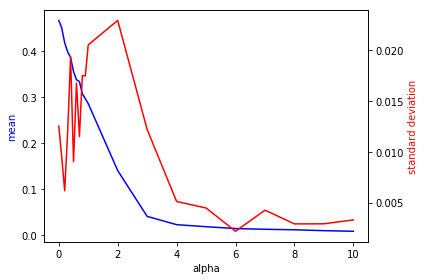

In [48]:
fig, ax1 = plt.subplots()

s1 = mean_list_tot
range1 = np.linspace(0.001, 0.901, 10).tolist() + list(range(1,1+len(mean_list)))
print(s1)
ax1.plot(range1,s1, 'b')
ax1.set_xlabel('alpha')

ax1.set_ylabel('mean', color='b')

ax2 = ax1.twinx()
s2 = std_list_tot
ax2.plot(range1, s2, 'r')
ax2.set_ylabel('standard deviation', color='r')



fig.tight_layout()
plt.show()